# Analisis EDA

# 1. Carga de Datos

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_quality = pd.read_csv('D:\Bootcamp\Henry\CURSO\Proyecto Final\Datasets\Air_Quality_20240909.csv')
data_quality.tail()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN
18024,151658,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,408.0,Jamaica,2005,01/01/2005,41.0,NaN


In [72]:
data_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


# 2. Limpieza de datos

In [73]:
data_quality.isna().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

In [74]:
#Eliminamos la columna con valores nulos
data_quality=data_quality.drop(columns='Message', axis=1)
data_quality.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1


In [75]:
#Eliminamos filas con valores nulos
data_quality = data_quality[data_quality['Geo Join ID'].notna()]
data_quality.isna().sum()

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [76]:
#verificamos duplicados en la columna de 'Unique ID'
duplicados = data_quality['Unique ID'].duplicated()
duplicados.sum()

np.int64(0)

In [77]:
data_quality['Name'].unique()

array(['Boiler Emissions- Total SO2 Emissions', 'Fine particles (PM 2.5)',
       'Nitrogen dioxide (NO2)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Ozone (O3)', 'Asthma hospitalizations due to Ozone',
       'Boiler Emissions- Total NOx Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Outdoor Air Toxics - Formaldehyde',
       'Asthma emergency departments visits due to Ozone',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Cardiac and respiratory deaths due to Ozone',
       'Deaths due to PM2.5', 'Outdoor Air Toxics - Benzene',
       'Annual vehicle miles traveled (trucks)',
       'Annual vehicle miles traveled (cars)'], dtype=object)

Name
Fine particles (PM 2.5)                             5922
Nitrogen dioxide (NO2)                              5922
Ozone (O3)                                          2115
Asthma emergency departments visits due to Ozone     480
Asthma hospitalizations due to Ozone                 480
Asthma emergency department visits due to PM2.5      480
Annual vehicle miles traveled (cars)                 321
Annual vehicle miles traveled                        321
Annual vehicle miles traveled (trucks)               321
Deaths due to PM2.5                                  240
Name: count, dtype: int64


C:\Users\Losse\AppData\Local\Temp\ipykernel_26640\695601142.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_quality, x='Name', order=data_quality['Name'].value_counts().index[:10], palette='viridis')


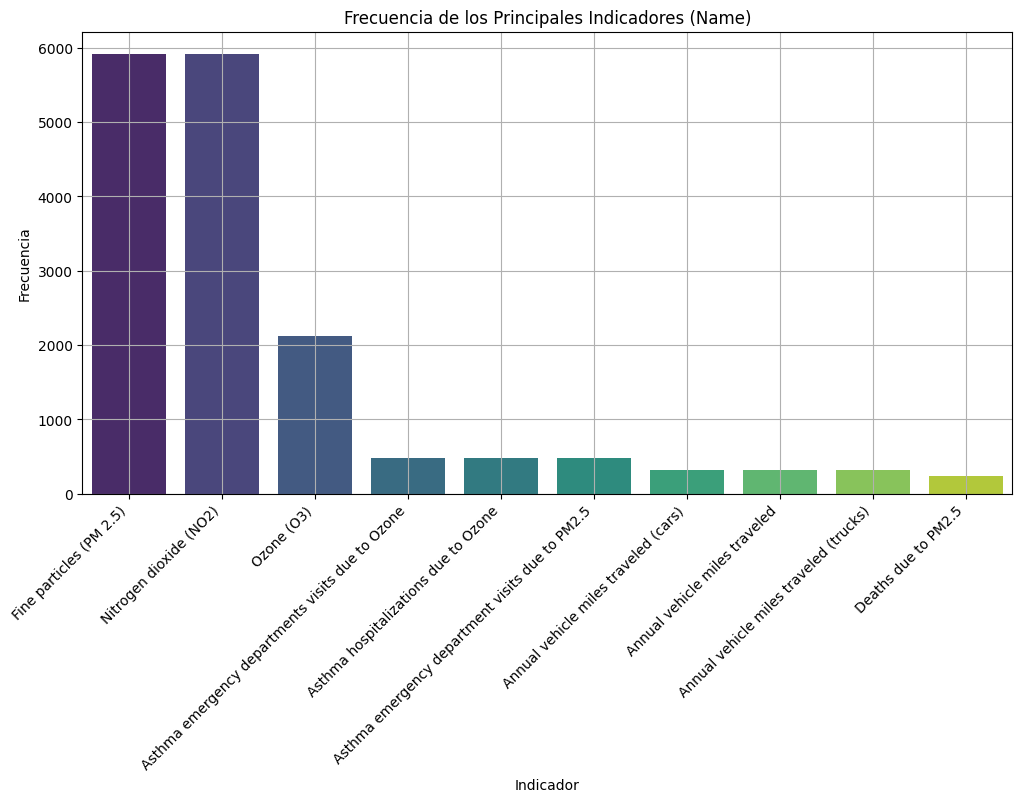

In [78]:
# Frequency of categorical variables
print(data_quality['Name'].value_counts().head(10))

# Plotting frequency of top categories
plt.figure(figsize=(12, 6))
sns.countplot(data=data_quality, x='Name', order=data_quality['Name'].value_counts().index[:10], palette='viridis')
plt.title('Frecuencia de los Principales Indicadores (Name)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Indicador')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [79]:
# Convertir Time Period a formato datetime
data_quality['Time Period'] = pd.to_datetime(data_quality['Time Period'], errors='coerce')

# Verificar si hubo conversiones incorrectas
print(data_quality['Time Period'].isnull().sum())

16359


Time Period
2005.0    417
2019.0    321
2010.0    321
2011.0    214
2015.0    144
2013.0    144
2014.0     96
Name: count, dtype: int64


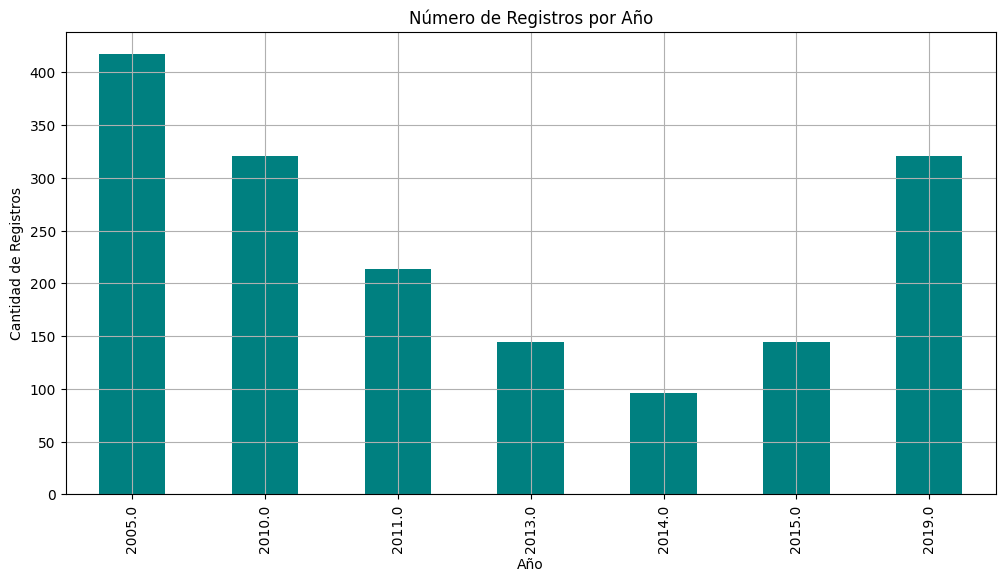

In [80]:
# Resumen de los años presentes en los datos
print(data_quality['Time Period'].dt.year.value_counts())

# Gráfico de la cantidad de registros por año
plt.figure(figsize=(12, 6))
data_quality['Time Period'].dt.year.value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Número de Registros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.grid(True)
plt.show()

C:\Users\Losse\AppData\Local\Temp\ipykernel_26640\65421846.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')


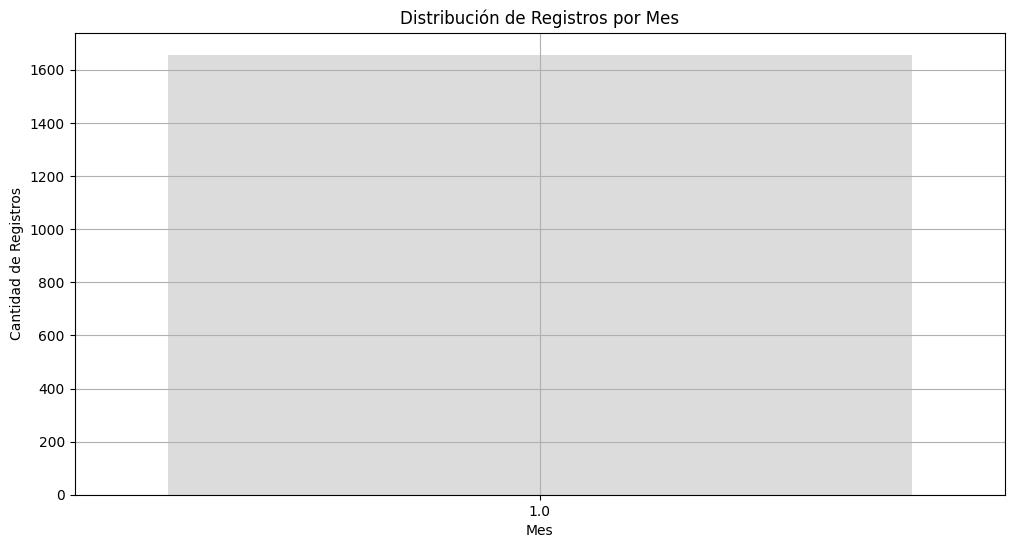

In [81]:
# Añadir columna de Mes y Año
data_quality['Month'] = data_quality['Time Period'].dt.month
data_quality['Year'] = data_quality['Time Period'].dt.year

# Conteo de registros por mes
monthly_counts = data_quality.groupby('Month').size()

# Gráfico de la cantidad de registros por mes
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')
plt.title('Distribución de Registros por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.grid(True)
plt.show()

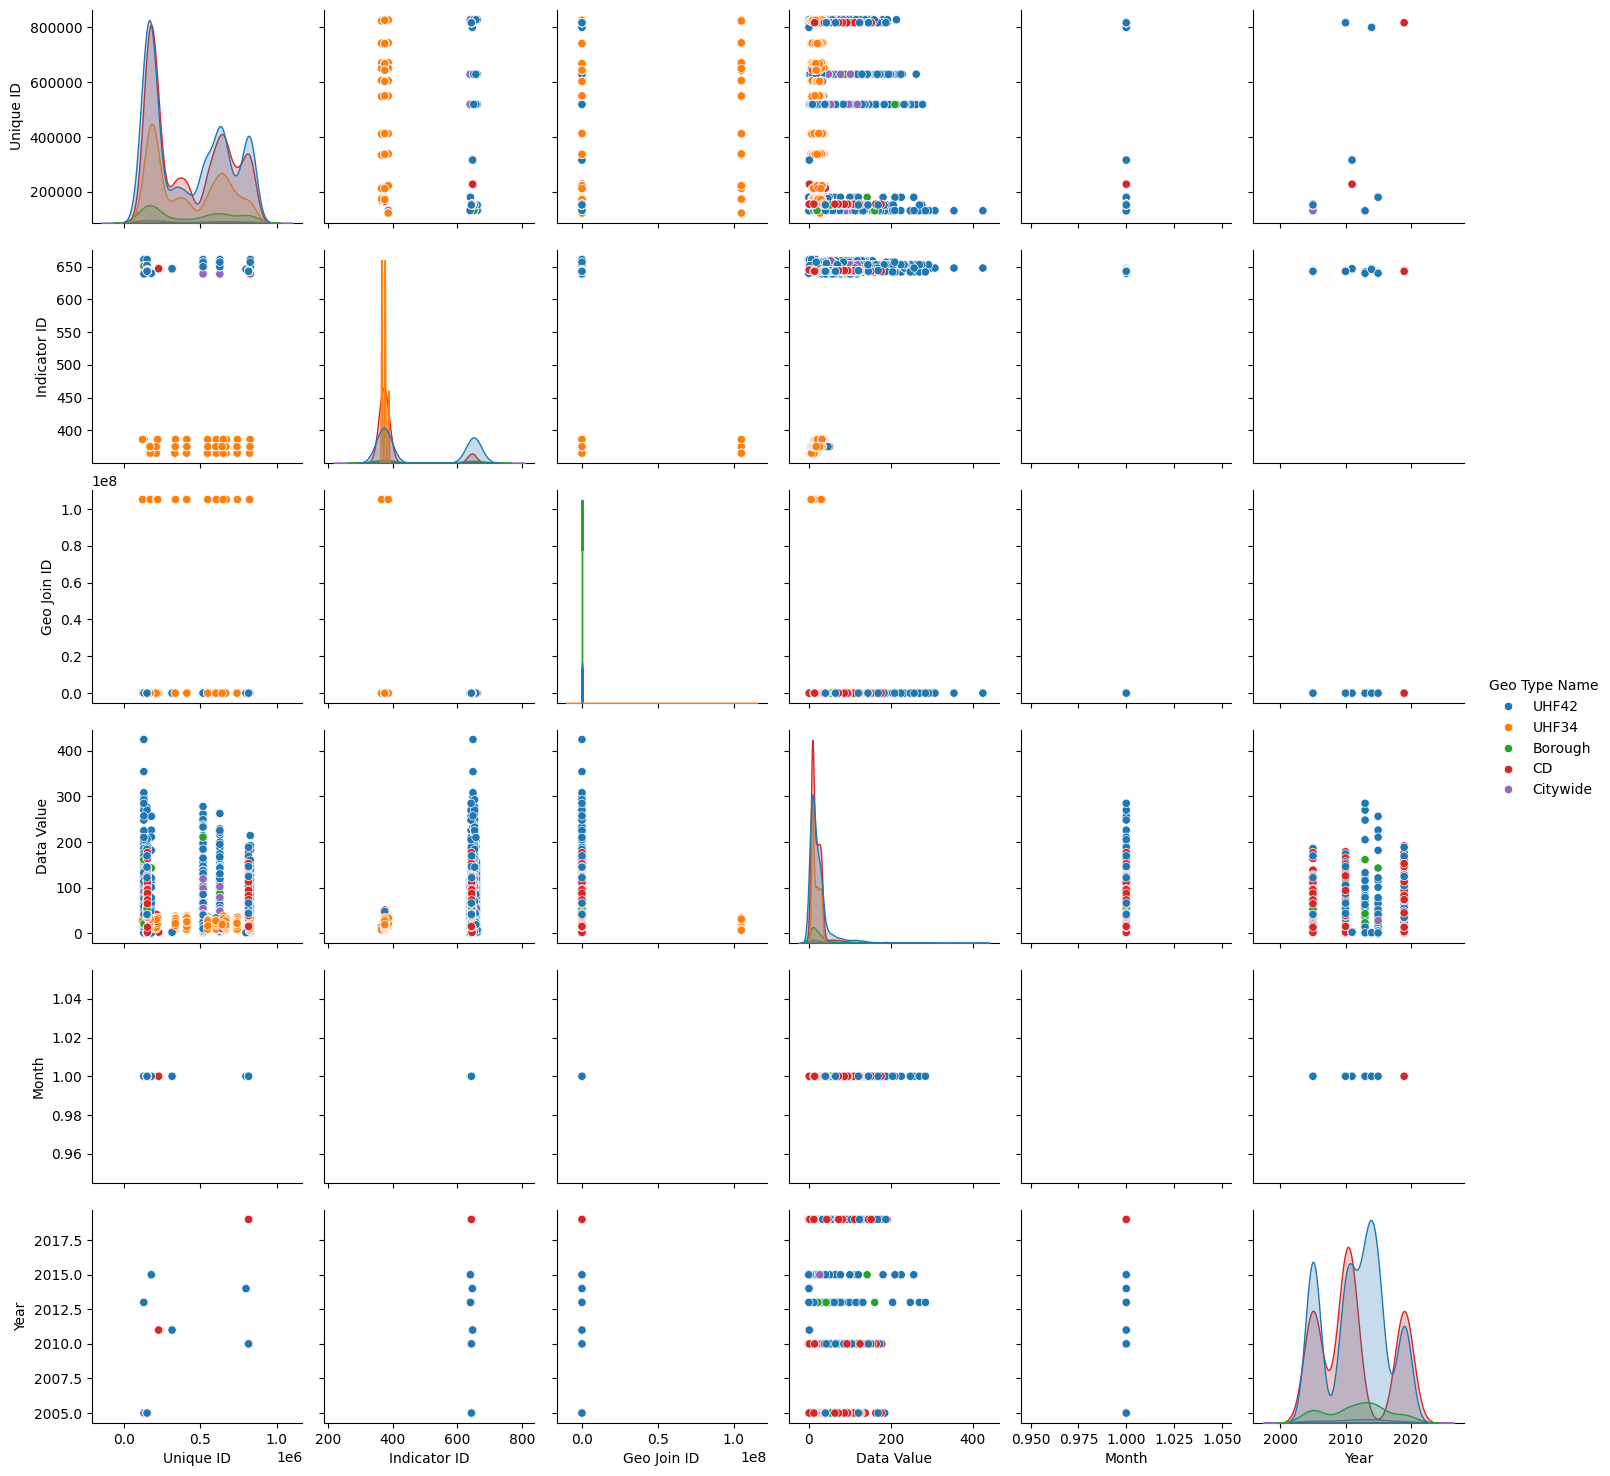

In [82]:
sns.pairplot(data_quality, hue='Geo Type Name')
plt.show()

In [83]:
data_quality_01 = data_quality[data_quality['Name'].str.contains('Boiler Emissions- Total SO2 Emissions')]
data_quality_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 17734
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unique ID       96 non-null     int64         
 1   Indicator ID    96 non-null     int64         
 2   Name            96 non-null     object        
 3   Measure         96 non-null     object        
 4   Measure Info    96 non-null     object        
 5   Geo Type Name   96 non-null     object        
 6   Geo Join ID     96 non-null     float64       
 7   Geo Place Name  96 non-null     object        
 8   Time Period     96 non-null     datetime64[ns]
 9   Start_Date      96 non-null     object        
 10  Data Value      96 non-null     float64       
 11  Month           96 non-null     float64       
 12  Year            96 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 10.5+ KB


In [84]:
data_quality_01['Geo Type Name'].unique()

array(['UHF42', 'Borough', 'Citywide'], dtype=object)

Text(0, 0.5, 'Data Value')

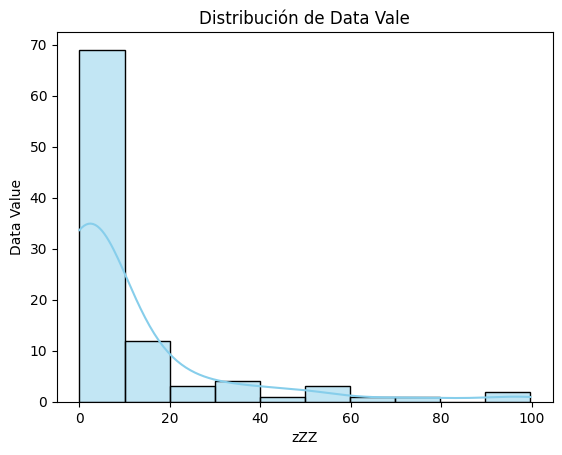

In [85]:

sns.histplot(data=data_quality_01, x='Data Value',bins=10, kde=True, color='skyblue')
plt.title('Distribución de Data Vale')
plt.xlabel('zZZ')
plt.ylabel('Data Value')

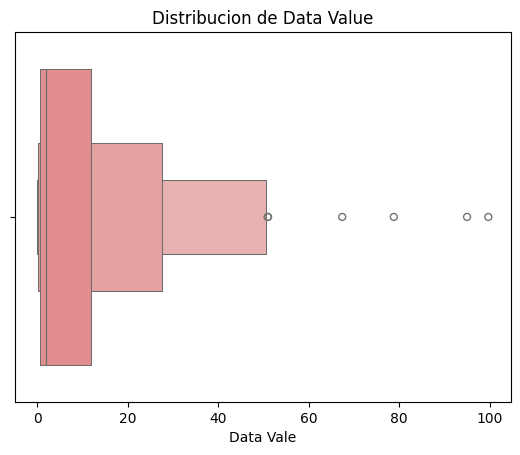

In [86]:
sns.boxenplot(x=data_quality_01['Data Value'], color='lightcoral')
plt.title('Distribucion de Data Value')
plt.xlabel('Data Vale')
plt.show()